# example1
### 대출자들의 채무 상환과 관련된 데이터 - 상환 여부 예측

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")

# 데이터 scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split # train set / test set 분리

# 분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [32]:
df = pd.read_csv("C:/Users/user/Dabin/data/HMEQ.csv", engine = "python")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 데이터 설명
* 척도 : Binary
* BAD[이산형, Binary] : 1-대출 채무 불이행 / 0-상환 대출
* LOAN[연속형, interval] : 대출 요청 금액
* MORTDUE[연속형, interval] : 기존 모기지 금액
* VALUE[연속형, interval] : 현재 자산
* REASON[이산형, Binary] : 대출 목적(DebtCon-부채 정리,HomeImp-주택 개량)
* JOB[범주형, Nominal] : 6가지 직업 분류
* YOJ[연속형, interval] : 연차
* DEROG[연속형, interval] : 주요 손실보고
* DELINQ[연속형, interval] : 연체 신용 한도
* CLAGE[연속형, interval] : 최장 계좌 연속월
* NINQ[연속형, interval] : 최근 신용 한도
* CNLO[연속형, interval] : 신용 한도의 수
* DEBTINC[연속형, interval] : 부채 비율

In [3]:
# Null 값 확인
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
# 중앙값으로 결측값 대체
df.fillna(df.median(), inplace = True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df.isnull().sum()

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [6]:
# 더미 변수 생성
df_dummy = pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis = 1, inplace = False)

In [8]:
# train set / test set 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
df_train_x.head()

train data size:(2623, 18)
test data size:(1125, 18)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


## 모델 생성 - 기본 옵션으로 모델 생성

In [9]:
nn_uncustomized = MLPClassifier(random_state = 1234)

# hidden_layer_sizes = (100, 100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.904


### ㄴ 모델 정확도는 train 90.8%, test 90.4%로 성능이 양호하고 유사한 수준

In [10]:
nn_uncustomized

MLPClassifier(random_state=1234)

## 모델 생성
### Hidden Layer : 은닉층 변경

#### 은닉층 1개, 노드 20~160

In [11]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# hidden_layer_sizes : 은닉층 변경 (20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) # 1D (20,), (40,), ...
    # nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) # 2D (20, 20), (40, 40), ...
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy 

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.908,0.908
1,40,0.883,0.884
2,60,0.910,0.911
3,80,0.910,0.910
4,100,0.908,0.904
5,120,0.909,0.909
6,140,0.908,0.908
7,160,0.910,0.908


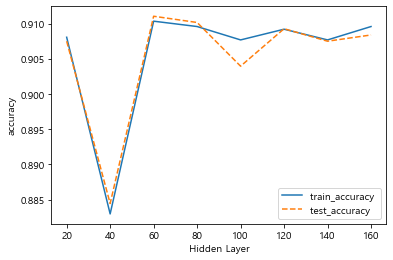

In [12]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

#### 은닉층 2개, 노드 20~160

In [13]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# hidden_layer_sizes : 은닉층 변경 (20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) # 1D (20,), (40,), ...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) # 2D (20, 20), (40, 40), ...
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy 

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.910,0.911
1,40,0.897,0.893
2,60,0.140,0.142
3,80,0.910,0.910
4,100,0.910,0.909
5,120,0.910,0.909
6,140,0.185,0.186
7,160,0.908,0.908


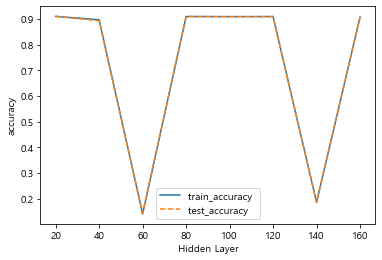

In [14]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

### ㄴ 은닉층 구조가 복잡할수록 모델 정확도는 향상됨

## 모델 Parameter 조정
### - Activation : 활성화 함수 변경

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state=1234) # 1D (20,), (40,), ...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivateFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy 

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivateFunction,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.908,0.904


### ㄴ "relu" 함수 적용시 모델의 정확도가 상대적으로 낮음. 단, scale 변환 후 모델 성능 비교 필요

## Scale 변환
### - Standardscaler : 설명변수 scale 변경

In [16]:
# 변수명 저장
v_feature_name = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.223874,-0.001865,-0.267462,-0.339658,-0.966876,-0.008787,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.263158,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.173867,0.266936,-0.267462,-0.339658,-1.121586,-0.654532,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.263158,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.261847,-0.942666,-0.267462,-0.339658,-1.094463,-0.654532,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.791667,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.092112,0.401336,-0.267462,-0.339658,-1.344210,-0.008787,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.791667,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.192603,-0.673866,-0.267462,-0.339658,-1.060119,-0.654532,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.791667,-0.574064,-0.131804,-0.189556


In [17]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


In [18]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# train 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.973
Accuracy on test set: 0.944


C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 새로운 MLPClssifier 모델 Parameter 변경
### Hidden Layer : 은닉층 변경

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden = [20 * hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) # 1D (20,), (40,), ...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) # 2D (20, 20), (40, 40), ...
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy 

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.979,0.951
1,40,0.991,0.952
2,60,0.999,0.948
3,80,1.000,0.956
4,100,1.000,0.954
5,120,1.000,0.954
6,140,1.000,0.956
7,160,1.000,0.959
8,180,1.000,0.958
9,200,1.000,0.958


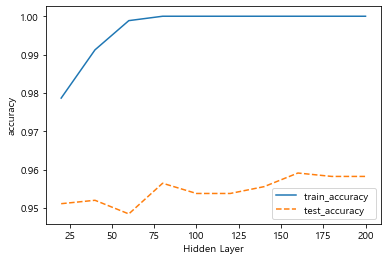

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

### ㄴ 은닉층 구조가 복잡할수록 모델 정확도는 향상됨

In [21]:
# 은닉층 지정(임의)
hidden_layer_sizes = 80

## 새로운 MLPClassifier모델 Parameter 변경
### - Activation : 활성화 함수 변경

In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivateFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy 

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivateFunction,TrainAccuracy,TestAccuracy
0,logistic,0.936,0.931
1,tanh,1.000,0.952
2,relu,1.000,0.956


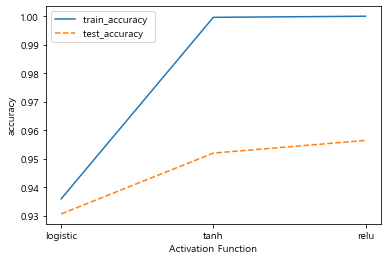

In [23]:
# Activation Function별 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_function, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()

### ㄴ "relu" 함수의 모델이 가장 높은 정확도를 보임. 특히, 데이터 scaling 영향을 많이 받음

## 새로운 MLPClassifier 모델 Parameter 변경
### - Solver : 가중치 최적화 변경

In [24]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# solver 변경
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy 

# Activation Function별 정확도 테이블
df_accuracy_solver.round(3)

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.950
1,sgd,0.934,0.927
2,adam,1.000,0.956


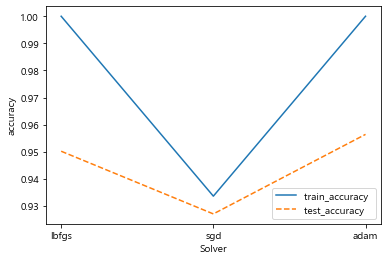

In [25]:
# Solver별 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_solver, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Solver")
plt.legend()

### ㄴ "adam" 최적화 모델이 가장 높은 정확도를 보임. 특히 대량 데이터 적용 시 모델의 성능이 우수한 편임

In [26]:
# Solver 지정(임의)
solver = "adam"

## 새로운 MLPClassifier 모델 Parameter 변경
### - Mini Batch 변경

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# Mini Batch 변경
para_batch = [20 * batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu", 
                       hidden_layer_sizes = (80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch['Solver'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy 

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,20,1.0,0.957
1,40,1.0,0.957
2,60,1.0,0.957
3,80,1.0,0.958
4,100,1.0,0.956
5,120,1.0,0.958
6,140,1.0,0.958
7,160,1.0,0.957
8,180,1.0,0.957


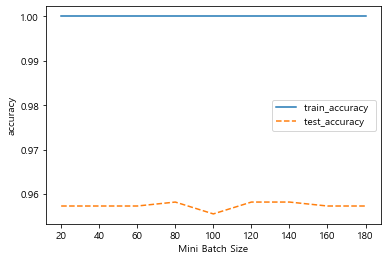

In [28]:
# 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_batch, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

### ㄴ train 데이터에는 과적합 경향, test 데이터에는 미니 배치 크기가 증가할수록 오차 증가 경향성 있음

## 결론 도출
### - 최종 모델 선택

In [31]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (80, 80), activation = "relu", solver = "adam",
                        batch_size = 100, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

#  평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}".format(nn_model.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_model.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.956

Confusion matrix: 
[[1020    1]
 [  49   55]]
